In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model as LM
import requests

df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40,NaN,NaN
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88,NaN,NaN
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11,NaN,NaN
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61,NaN,NaN


In [141]:
column_names = {"X1":"Relative_Compactness", "X2":"Surface_Area","X3":"Wall_Area",
               "X4":"Roof_Area","X5":"Overall_Height","X6":"Orientation","X7":"Glazing_Area",
               "X8":"Glazing_Area_Distribution","Y1":"Heating_Load","Y2":"Cooling_Load"
               }
df = df.rename(columns = column_names)
df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40,NaN,NaN
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88,NaN,NaN
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11,NaN,NaN
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61,NaN,NaN


In [152]:
#df.dropna(axis=1, how="all, inplace=True")
new_df = df.iloc[: , :-2] # for particular column you don't need
new_df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


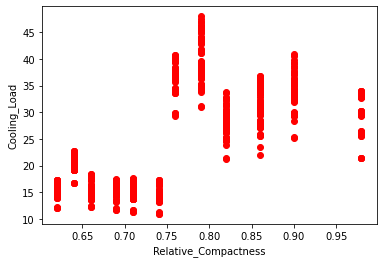

In [121]:
%matplotlib inline
plt.xlabel("Relative_Compactness")
plt.ylabel("Cooling_Load")
plt.scatter(df.Relative_Compactness, df.Cooling_Load, color = "red")

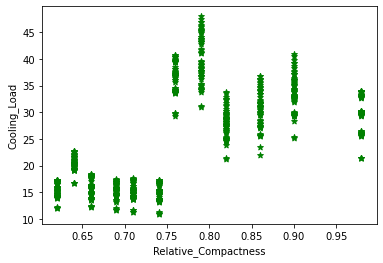

In [122]:
plt.xlabel("Relative_Compactness")
plt.ylabel("Cooling_Load")
plt.scatter(df.Relative_Compactness, df.Cooling_Load, color = "green", marker="*")

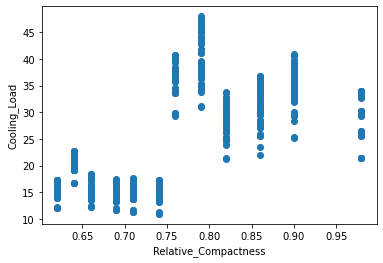

In [123]:
x = np.array(df["Relative_Compactness"])
y = np.array(df["Cooling_Load"])
plt.xlabel("Relative_Compactness")
plt.ylabel("Cooling_Load")
plt.scatter(x,y)

<AxesSubplot:xlabel='Relative_Compactness', ylabel='Cooling_Load'>

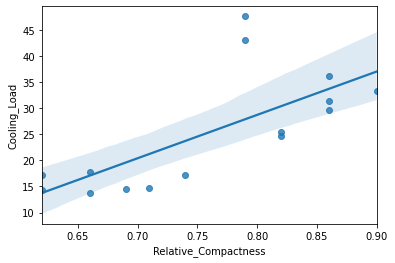

In [124]:
SLR_df = df[["Relative_Compactness","Cooling_Load"]].sample(15, random_state = 2)
sns.regplot(x="Relative_Compactness",y="Cooling_Load",data=SLR_df)

In [126]:
y = np.array(df["Cooling_Load"])
x = np.array(df["Relative_Compactness"])

In [138]:
new_df = df.iloc[:,:-2]
new_df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [137]:
df.dropna(axis=1, how="all", inplace=True)
df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [101]:
df[["Heating_Load","Cooling_Load"]].min()

Heating_Load     6.01
Cooling_Load    10.90
dtype: float64

In [103]:
df[["Heating_Load","Cooling_Load"]].max()

Heating_Load    43.10
Cooling_Load    48.03
dtype: float64

In [66]:
#Firstly,   we   normalise   our   dataset   to   a   common   scale   using   the   min max scaler  
from sklearn.preprocessing import MinMaxScaler #StandardScaler
#MinMaxScaler works well no data that are not normally distributed
 #Scales the range of features between 0 and 1
 #it doesnot perform well on features that have outliers(find out meaning of outliers)
 # Does not change shape of distribution of the feature
#StandardScaler are used on data that are normal distributed
from sklearn.linear_model import LinearRegression
scaler   =   MinMaxScaler()  
normalised_df   =   pd.DataFrame(scaler.fit_transform(df),   columns=df.columns)  
features_df   =   normalised_df.drop(columns=[ 'Heating_Load','Cooling_Load' ])  
heating_target   =   normalised_df[ 'Heating_Load' ]

In [104]:
normalised_df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085
...,...,...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0,0.320032,0.282790
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0,0.283904,0.161056
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0,0.281208,0.167250
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0,0.282286,0.153784


In [79]:
features_df
# all dataset except Heating_Load and Cooling_load

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0


In [81]:
heating_target # dataset for Heating_load

0      0.257212
1      0.257212
2      0.257212
3      0.257212
4      0.399838
         ...   
763    0.320032
764    0.283904
765    0.281208
766    0.282286
767    0.286600
Name: Heating_Load, Length: 768, dtype: float64

In [155]:
#Now,we split our dataset into the training and testing dataset. Recall that   we 
#had earlier  segmented the features and target variables.  
from sklearn.model_selection import train_test_split  
x_train,x_test,y_train,y_test = train_test_split(features_df,heating_target,test_size= 0.3 ,random_state= 1 )

#fit the model to the training dataset
model = LinearRegression().fit(x_train,y_train)

In [156]:
x_test # 

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
285,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,0.250,1.0
101,0.777778,0.166667,0.428571,0.111111,1.0,0.333333,0.250,0.4
581,0.777778,0.166667,0.428571,0.111111,1.0,0.333333,1.000,0.4
352,0.472222,0.416667,0.571429,0.333333,1.0,0.000000,0.625,0.4
726,0.777778,0.166667,0.428571,0.111111,1.0,0.666667,1.000,1.0
...,...,...,...,...,...,...,...,...
241,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.250,1.0
599,0.388889,0.500000,1.000000,0.111111,1.0,1.000000,1.000,0.4
650,0.333333,0.583333,0.000000,1.000000,0.0,0.666667,1.000,0.6
11,0.666667,0.250000,0.285714,0.333333,1.0,1.000000,0.000,0.0


In [106]:
x_train

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
88,0.055556,0.916667,0.571429,1.000000,0.0,0.000000,0.250,0.2
467,0.194444,0.750000,0.285714,1.000000,0.0,1.000000,0.625,0.8
550,0.388889,0.500000,1.000000,0.111111,1.0,0.666667,1.000,0.2
147,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.250,0.6
481,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.625,1.0
...,...,...,...,...,...,...,...,...
645,0.388889,0.500000,1.000000,0.111111,1.0,0.333333,1.000,0.6
715,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.000,0.8
72,0.333333,0.583333,0.000000,1.000000,0.0,0.000000,0.250,0.2
235,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,0.250,0.8


In [108]:
#obtain predictions  
predicted_values = model.predict(x_test)
predicted_values

array([0.19628906, 0.57910156, 0.73291016, 0.71142578, 0.76025391,
       0.24365234, 0.17089844, 0.60839844, 0.23535156, 0.56298828,
       0.30908203, 0.65576172, 0.69433594, 0.29443359, 0.19775391,
       0.72363281, 0.58007812, 0.31347656, 0.26171875, 0.74609375,
       0.70214844, 0.07763672, 0.61816406, 0.32519531, 0.20410156,
       0.73632812, 0.32324219, 0.19287109, 0.79589844, 0.27441406,
       0.67822266, 0.72509766, 0.140625  , 0.28955078, 0.58203125,
       0.80761719, 0.32861328, 0.12841797, 0.73095703, 0.24365234,
       0.82324219, 0.15917969, 0.11474609, 0.17138672, 0.12402344,
       0.15234375, 0.49169922, 0.69482422, 0.75634766, 0.71875   ,
       0.10498047, 0.66308594, 0.10888672, 0.24658203, 0.76074219,
       0.76367188, 0.73339844, 0.63964844, 0.15820312, 0.29052734,
       0.20068359, 0.59082031, 0.61083984, 0.76464844, 0.56787109,
       0.92724609, 0.67919922, 0.31298828, 0.66699219, 0.23193359,
       0.55078125, 0.25048828, 0.23535156, 0.72753906, 0.29394

In [84]:
#MAE  
from sklearn.metrics import mean_absolute_error  
mae = mean_absolute_error(y_test,predicted_values)  
round(mae, 3)

0.064

In [85]:
rss = np.sum(np.square(y_test - predicted_values))  
round(rss,3) 

1.834

In [86]:
from sklearn.metrics import mean_squared_error  
rmse = np.sqrt(mean_squared_error(y_test,predicted_values))  
round(rmse,3)

0.089

In [87]:
from sklearn.metrics import r2_score  #R-square value
r2_score = r2_score(y_test,predicted_values)  
round(r2_score,3) 

0.893